In [7]:
import numpy as np
import matplotlib.pyplot as plt
import magnets as m

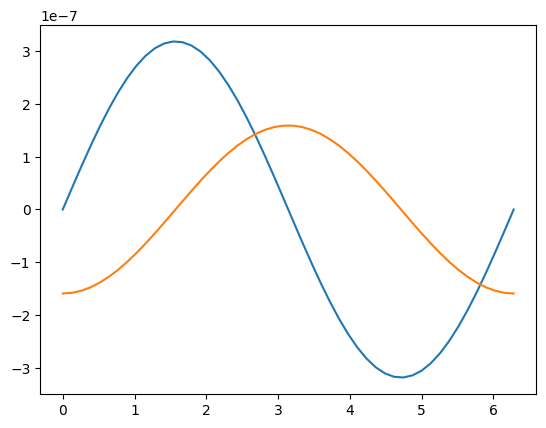

In [9]:
import magnets as m
northpos = np.array([0, 0, 1])
southpos = np.array([0, 0, -1])

plotlim = np.pi*2
pis = np.arange(0, plotlim, np.pi)
lats = np.linspace(0, plotlim)
longs = np.linspace(0, plotlim)
cart = np.zeros((len(lats), 3))
sph = np.zeros((len(lats), 2))


for i in range(len(lats)):
    cart[i] = m.magnetic_field_cart(northpos, southpos, lats[i], 0)
    sph[i] = m.magnetic_field_sph(northpos, southpos, lats[i], 0)


plt.plot(lats, sph[:, 0], lats, sph[:, 1])
plt.show()